In [1]:
import numpy as np
import pandas as pd
import seaborn as snb
from sklearn.model_selection import train_test_split

from ID3 import ID3
from collections import namedtuple

Dataset = namedtuple('Dataset', 'filepath columns')
import datasets

In [30]:
def split_data(data: Dataset, train_test_ratio: float = 3 / 2, df = None):
    """
        a = train_size, b = test_size
        a/b = train_test_ratio = x
        a = b*x
        a / (a+b) = b*x / (b*x + b) = b*x / b*(x+1) = x / (x+1)
    """
    if df is None:
        df = pd.read_csv(data.filepath, names=data.columns, index_col=False)
    # print(df)
    x = train_test_ratio
    X_train, X_test, y_train, y_test = \
        train_test_split(df.drop('Class', axis=1), df['Class'], train_size=x / (x + 1), random_state=42)

    return X_train, X_test, y_train, y_test

In [4]:
DATASET = datasets.AL2

In [28]:
tmp = pd.read_csv(DATASET.filepath,names=DATASET.columns, index_col=False)
tmp = tmp.drop('spore-print-color', axis=1)
tmp
# tmp.to_csv(f'{DATASET.filepath}2.data', index=False)
# tmp.shape, tmp['Class'].value_counts()
# tmp.loc[tmp['Class'] == 'no-recurrence-events']

,Class,cap-shape,cap-surface,cap-color,bruises?,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,population,habitat
0,p,x,s,n,t,f,c,n,k,e,...,s,s,w,w,p,w,o,p,s,u
1,e,x,s,y,t,f,c,b,k,e,...,s,s,w,w,p,w,o,p,n,g
2,e,b,s,w,t,f,c,b,n,e,...,s,s,w,w,p,w,o,p,n,m
3,p,x,y,w,t,f,c,n,n,e,...,s,s,w,w,p,w,o,p,s,u
4,e,x,s,g,f,f,w,b,k,t,...,s,s,w,w,p,w,o,e,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,a,c,b,y,e,...,s,s,o,o,p,o,o,p,c,l
8120,e,x,s,n,f,a,c,b,y,e,...,s,s,o,o,p,n,o,p,v,l
8121,e,f,s,n,f,a,c,b,n,e,...,s,s,o,o,p,o,o,p,c,l
8122,p,k,y,n,f,f,c,n,b,t,...,s,k,w,w,p,w,o,e,v,l


In [31]:
X_train, X_test, y_train, y_test = split_data(DATASET, 3/2, tmp)

y_test = list(y_test)
col = list(DATASET.columns[1:]).remove('spore-print-color')
id3 = ID3(col)
id3.fit(X_train, y_train)

predictions = id3.predict(X_test)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [10]:
X_train.shape, X_test.shape

((4874, 21), (3250, 21))

In [11]:
def get_percentage(predictions, y_test):
    cnt = 0
    y_test = list(y_test)
    for i, val in enumerate(predictions):
        # print(i, val)
        cnt += 1 if predictions[i] == y_test[i] else 0

    print(f'{cnt / len(predictions) * 100:.2f}')


In [12]:
def plot(predictions, y_test):
    TP, FN, FP, TN = 0, 0, 0, 0

    values = np.unique(y_test)

    for i, val in enumerate(predictions):
        if y_test[i] == values[0] and predictions[i] == values[0]:
            TP += 1
        elif y_test[i] == values[0] and predictions[i] == values[1]:
            FN += 1
        elif y_test[i] == values[1] and predictions[i] == values[0]:
            FP += 1
        elif y_test[i] == values[1] and predictions[i] == values[1]:
            TN += 1

    print(f'val[0]={values[0]}: {TP+FN}, val[1]={values[1]}: {FP+TN}')
    print(f'{TP:=} {FN:=} \n {FP:=} {TN:=}')
    # print(f'{cnt / len(predictions) * 100:.2f}')
    print(values)

    data = np.array([
        [TP, FN],
        [FP, TN]
    ])
    ax = snb.heatmap(data, annot=True, xticklabels=values, yticklabels=values)
    ax.set(xlabel='Przewidywana wartość', ylabel='Prawdziwa wartość', title='Macierz pomyłek')
    ax.xaxis.tick_top()

In [13]:
get_percentage(predictions, y_test)

100.00


val[0]=e: 1678, val[1]=p: 1572
1678 0 
 0 1572
['e' 'p']


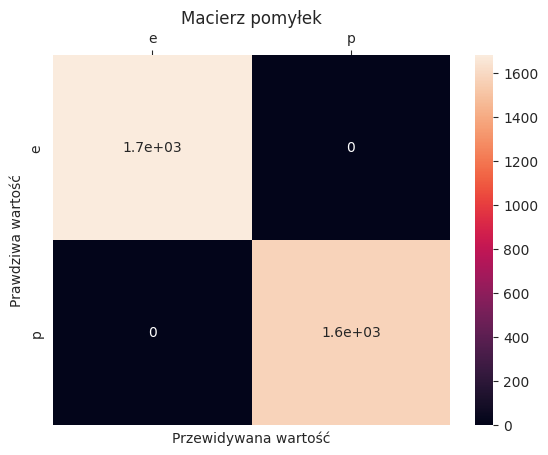

In [14]:
plot(predictions, y_test)